# Ley de los Grandes Números (LLN: Large Numbers Law)

## Introducción

Cuando hablamos de estadística y de eventos aleatorios la intuición nos dice que cuanto más realicemos el experimento más a salvo estaremos de situaciones "anómalas" aparentemente irracionales.

Si disponemos de una moneda y la lanzamos al aire sabemos que (¡siempre que sea una moneda "fiel"!) tanto la cara como la cruz disponen de una probabilidad del 50% de que ocurran. Pero también hemos sufrido, o disfrutado, en repeticiones de este experimiento, rachas de varias caras o varias cruces de manera consecutiva. Esta situación es improbable?: Sí, según la longitud de la racha!, pero es imposible? No, en absoluto. La intuición nos dice que a larga, y con un número suficiente de repeticiones del experimiento, llegaremos a una media igual a la teórica: 1/2, o 50% de caras y 50% de cruces.

He escrito este posts para explicar estos conceptos por medio de dos teóremas fundamentales de la Estadística: La Ley de los Grandes Números y el Teorema del Límite Central. En este post hablaremos del primero.

Vamos a basarnos en distribuciones Binomiales, de Bernouilli, en este trabajo.Veremos brevemente estas dos distribuciones, y además introduciremos el Teorema de Markov y el Teorema de Chebyshev, necesarios para la demostración de los Teoremas protagonistas de este post.

## Distribución de Bernouilli

Es esta una distribución de probabilidad de una variable aleatoria en la que definimos un éxito, $valor=1$,  con una probabilidad $p$ y un fracaso, $valor=0$, con probabilidad $q=1-p$. Caso práctico es el mencionado en la Introducción, en el caso de que la moneda sea fiel tendremos una Distribución de Bernouilli con $p=1/2$. 

Calculemos el valor esperado y la varianza de esta distribución, usaremos estos valores posteriormente:

$E[\,X]\,=\sum\limits_x x*p(x)=1*p+0*q=p$

$Var[\,X]\,=\|E[\,X^2]\,-E[\,X\,]^2\|=1^2*p+0*q-p*p=p-p^2=p(1-p)$


 ## Distribución binomial

En el caso de que repitamos experimentos basados en la distribución anterior nos encontraremos con una distribución binomial. 

La caracterizaremos por un valor $p$, probabilidad de éxito, y un valor $n$, número de experimentos realizados. Formalmente una variable aleatoria con distribución binomial la representaremos tal que $X\sim B(n,p)$. $X$ marca el número de éxitos tras los $n$ intentos o experimentos.

La función de densidad de probabilidad es:

$f(x)={n\choose k} p^k * (1-p)^{n-k}$, con $k\in\{0..n\}$

y con un valor esperado $E(X)=n*p$ y una varianza $V(X)=n*p*(1.p)$

## Desigualdad de Markov

La desigualdad de Markov nos dice que siendo $X$ una variable aleatoria, con valores siempre mayor o igual que cero, entonces:

$P(X\geq a)\leq {E[X] / a} \;  \forall a > 0$ 

Veamos una rápida demostración. Para ello definimos una variable auxiliar I, tal que:
$
I=\left\{
                \begin{array}{ll}
                  1 \; si X \geq a\\
                  0 \;resto
                \end{array}
              \right.
$

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [27]:
def generador_binomial(terminos_a_sumar,p,numero_de_iters):
    media=[]
    varianza=[]
    series={}
    varianza_base=p*(1-p)      
    var_teorica=[]
    for n in terminos_a_sumar:
        valores=np.random.binomial(n,0.5,numero_de_iters)/n
        media.append(valores.mean())
        var_teorica.append(varianza_base/n)
        varianza.append(valores.std()**2)
        series[n]=valores
    return series,var_teorica,media,varianza

In [28]:
lista_terms_sum=[10,50,100,200,300,400,500,700,1000] #han de ser 9!
#lista_terms_sum=[10,100,500,1000,5000,10000,50000,100000,1000000]
#lista_terms_sum=[10,20,30,40,50,60,70,80,90]
series,var_teorica,media,varianza=generador_binomial(lista_terms_sum,p=1/2,numero_de_iters=1000)

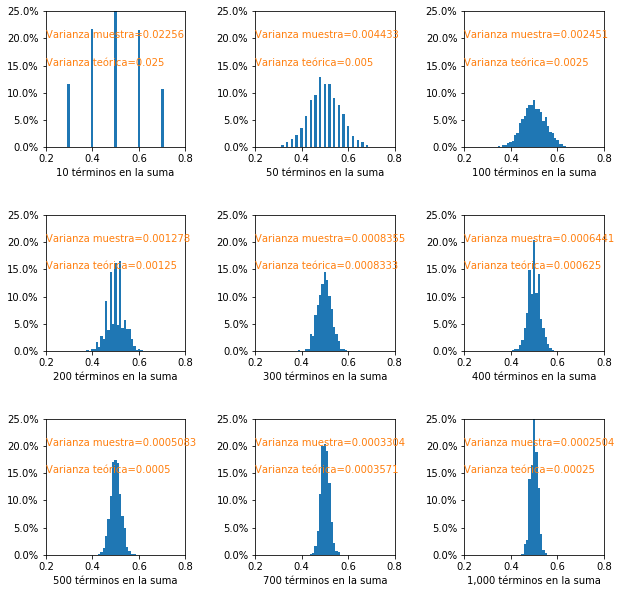

In [32]:
f = plt.figure(figsize=(10,10))
f.subplots_adjust(hspace=1, wspace=1)
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7= f.add_subplot(337)
ax8= f.add_subplot(338)
ax9= f.add_subplot(339)
f.subplots_adjust(hspace=.5, wspace=0.5)
lista_axes=f.get_axes()
N_bins=np.linspace(0,1,100)
n_decimales=2
for i in range(0,9):
    lista_axes[i].set_xlabel('{:,} términos en la suma'.format(lista_terms_sum[i]))
    lista_axes[i].yaxis.set_major_formatter(PercentFormatter(1))
    lista_axes[i].set_xlim(0.2,0.8)
    lista_axes[i].set_ylim(0.0,0.25)
    counts, bins = np.histogram(np.around(series[lista_terms_sum[i]],decimals=n_decimales),bins=N_bins)
    lista_axes[i].hist(bins[:-1],bins,weights=counts/counts.sum())
    lista_axes[i].text(0.0,0.8,'Varianza muestra={:.4}'.format(varianza[i]),transform=lista_axes[i].transAxes,color='tab:orange')
    lista_axes[i].text(0.0,0.6,'Varianza teórica={:.4}'.format(var_teorica[i]),transform=lista_axes[i].transAxes,color='tab:orange')
    

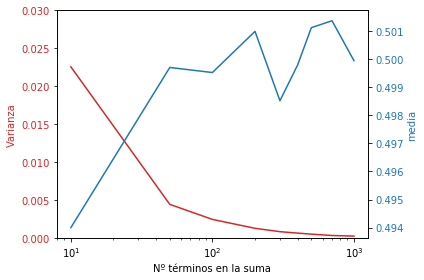

In [30]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xscale('log', basex=10)
ax1.set_xlabel('Nº términos en la suma')
ax1.set_ylabel('Varianza', color=color)
ax1.set_ylim(0,0.03)
ax1.plot(lista_terms_sum,varianza, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('media', color=color)  
ax2.plot(lista_terms_sum,media, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  